In [33]:
from sklearn import datasets
import numpy as np


In [91]:
#1of6 sepal length / sepal width

iris = datasets.load_iris()

X = iris.data[:, [0, 1]]
y = iris.target


In [92]:
"""
SPLIT TRAINING AND TEST DATA
train_test_split from sklearn cross_validation: randomly split the X and y arrays 
into 30% test data (45 samples) and 70% training data (105 samples)
"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [93]:
unique = np.unique(y)


In [94]:
# Standardize features using sklearn preprocessing library

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [95]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier,
                          test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='o',
                    s=55, label='test set')

    

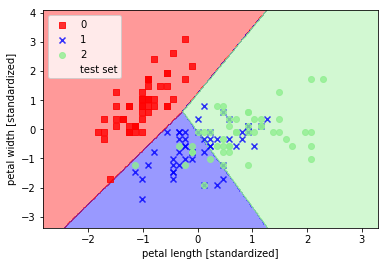

In [98]:
# Train the model using sklearn logistic regression libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
lr = LogisticRegression(C=1000, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [99]:
# with regularization set to 1000

In [100]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test_std)
print(lr.predict_proba(X_test_std[0:1, :]))
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassifications: %d' % (y_pred != y_test).sum())

[[  2.75700348e-07   6.09780121e-01   3.90219604e-01]]
Accuracy: 0.73
Misclassifications: 12


In [ ]:
# w/o regularization the misclassification total moved from 12 to 15 and the accuracy
# dropped from 73% to 67%

In [90]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test_std)
print(lr.predict_proba(X_test_std[0:1, :]))
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassifications: %d' % (y_pred != y_test).sum())

[[ 0.11187218  0.51706496  0.37106286]]
Accuracy: 0.67
Misclassifications: 15


In [10]:
#2of6 sepal length / petal length

In [42]:
X = iris.data[:, [0, 2]]
y = iris.target

In [43]:
"""
SPLIT TRAINING AND TEST DATA
train_test_split from sklearn cross_validation: randomly split the X and y arrays 
into 30% test data (45 samples) and 70% training data (105 samples)
"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


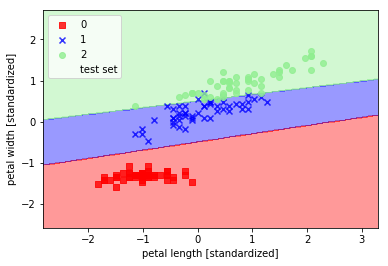

In [44]:
# Train the model using sklearn logistic regression libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
lr = LogisticRegression(C=1000, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [45]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test_std)
print(lr.predict_proba(X_test_std[0:1, :]))
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassifications: %d' % (y_pred != y_test).sum())

[[  7.52309742e-09   3.46719642e-01   6.53280351e-01]]
Accuracy: 0.96
Misclassifications: 2


In [15]:
#3of6 sepal length / petal width

In [46]:
X = iris.data[:, [0, 3]]
y = iris.target

In [47]:
"""
SPLIT TRAINING AND TEST DATA
train_test_split from sklearn cross_validation: randomly split the X and y arrays 
into 30% test data (45 samples) and 70% training data (105 samples)
"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


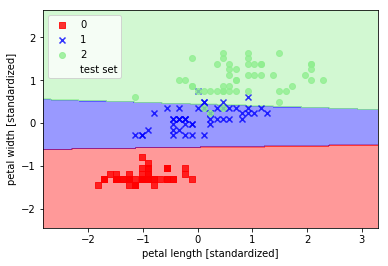

In [48]:
# Train the model using sklearn logistic regression libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
lr = LogisticRegression(C=1000, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [49]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test_std)
print(lr.predict_proba(X_test_std[0:1, :]))
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassifications: %d' % (y_pred != y_test).sum())

[[  1.50620967e-14   3.01319506e-01   6.98680494e-01]]
Accuracy: 0.96
Misclassifications: 2


In [20]:
#4of6 sepal width / petal length

In [50]:
X = iris.data[:, [1, 2]]
y = iris.target

In [51]:
"""
SPLIT TRAINING AND TEST DATA
train_test_split from sklearn cross_validation: randomly split the X and y arrays 
into 30% test data (45 samples) and 70% training data (105 samples)
"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


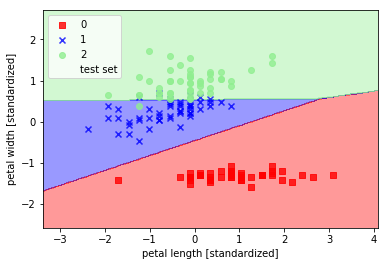

In [52]:
# Train the model using sklearn logistic regression libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
lr = LogisticRegression(C=1000, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [53]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test_std)
print(lr.predict_proba(X_test_std[0:1, :]))
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassifications: %d' % (y_pred != y_test).sum())

[[  1.43146849e-07   3.07601951e-01   6.92397905e-01]]
Accuracy: 0.96
Misclassifications: 2


In [25]:
#5of6 sepal width / petal width

In [54]:
X = iris.data[:, [1, 3]]
y = iris.target

In [55]:
"""
SPLIT TRAINING AND TEST DATA
train_test_split from sklearn cross_validation: randomly split the X and y arrays 
into 30% test data (45 samples) and 70% training data (105 samples)
"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


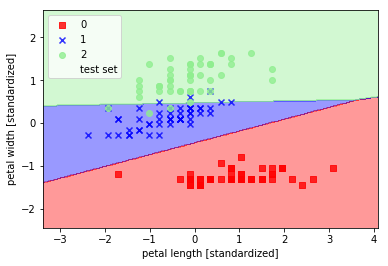

In [56]:
# Train the model using sklearn logistic regression libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
lr = LogisticRegression(C=1000, random_state=0, max_iter=100)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [57]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test_std)
print(lr.predict_proba(X_test_std[0:1, :]))
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassifications: %d' % (y_pred != y_test).sum())

[[  1.83728011e-12   2.67907444e-01   7.32092556e-01]]
Accuracy: 0.96
Misclassifications: 2


In [150]:
#6of6 petal length / petal width

In [58]:
X = iris.data[:, [2, 3]]
y = iris.target

In [59]:
"""
SPLIT TRAINING AND TEST DATA
train_test_split from sklearn cross_validation: randomly split the X and y arrays 
into 30% test data (45 samples) and 70% training data (105 samples)
"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


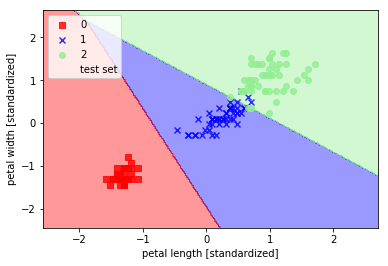

In [60]:
# Train the model using sklearn logistic regression libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
lr = LogisticRegression(C=1000, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [61]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test_std)
print(lr.predict_proba(X_test_std[0:1, :]))
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassifications: %d' % (y_pred != y_test).sum())

[[  2.05743774e-11   6.31620264e-02   9.36837974e-01]]
Accuracy: 0.98
Misclassifications: 1


In [162]:
#1of4 sepal length / sepal width / petal length

In [101]:
X = iris.data[:, [0, 1, 2]]
y = iris.target


In [102]:
"""
SPLIT TRAINING AND TEST DATA
train_test_split from sklearn cross_validation: randomly split the X and y arrays 
into 30% test data (45 samples) and 70% training data (105 samples)
"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [103]:
# Train the model using sklearn logistic regression libraries
from sklearn.linear_model import LogisticRegression

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
lr = LogisticRegression(random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test_std)
print(lr.predict_proba(X_test_std[0:1, :]))
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassifications: %d' % (y_pred != y_test).sum())

[[  1.95856027e-07   2.70048821e-01   7.29950983e-01]]
Accuracy: 0.96
Misclassifications: 2


In [ ]:
# w/o regularization AND MORE FEATURES the misclassification total moved from 2 to 10
# and the accuracy dropped from 96% to 78%.

# this suggests that regularization has a greater impact when more features are involved.
# this hypothesis makes logical since as the purpose of regularization is to reduce the "noise"
# created by potentially having too many parameters

In [104]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test_std)
print(lr.predict_proba(X_test_std[0:1, :]))
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassifications: %d' % (y_pred != y_test).sum())

[[ 0.02064185  0.38045225  0.5989059 ]]
Accuracy: 0.78
Misclassifications: 10


In [66]:
#2of4 sepal length / petal length / petal width

In [67]:
X = iris.data[:, [0, 2, 3]]
y = iris.target


In [68]:
"""
SPLIT TRAINING AND TEST DATA
train_test_split from sklearn cross_validation: randomly split the X and y arrays 
into 30% test data (45 samples) and 70% training data (105 samples)
"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [69]:
# Train the model using sklearn logistic regression libraries
from sklearn.linear_model import LogisticRegression

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
lr = LogisticRegression(C=1000, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test_std)
print(lr.predict_proba(X_test_std[0:1, :]))
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassifications: %d' % (y_pred != y_test).sum())

[[  3.53178425e-11   7.86068155e-02   9.21393184e-01]]
Accuracy: 0.98
Misclassifications: 1


In [71]:
#3of4 sepal width / petal length / petal width

In [72]:
X = iris.data[:, [1, 2, 3]]
y = iris.target


In [73]:
"""
SPLIT TRAINING AND TEST DATA
train_test_split from sklearn cross_validation: randomly split the X and y arrays 
into 30% test data (45 samples) and 70% training data (105 samples)
"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [74]:
# Train the model using sklearn logistic regression libraries
from sklearn.linear_model import LogisticRegression

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
lr = LogisticRegression(C=1000, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test_std)
print(lr.predict_proba(X_test_std[0:1, :]))
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassifications: %d' % (y_pred != y_test).sum())

[[  1.02802549e-09   9.08332819e-02   9.09166717e-01]]
Accuracy: 0.98
Misclassifications: 1


In [ ]:
#4of4 sepal length / sepal width / petal width

In [76]:
X = iris.data[:, [0, 1, 3]]
y = iris.target


In [77]:
"""
SPLIT TRAINING AND TEST DATA
train_test_split from sklearn cross_validation: randomly split the X and y arrays 
into 30% test data (45 samples) and 70% training data (105 samples)
"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [78]:
# Train the model using sklearn logistic regression libraries
from sklearn.linear_model import LogisticRegression

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
lr = LogisticRegression(C=1000, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test_std)
print(lr.predict_proba(X_test_std[0:1, :]))
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassifications: %d' % (y_pred != y_test).sum())

[[  1.20131032e-10   1.75917129e-01   8.24082871e-01]]
Accuracy: 0.96
Misclassifications: 2


In [121]:
X = iris.data[:, [0, 1, 2, 3]]
y = iris.target


In [122]:
"""
SPLIT TRAINING AND TEST DATA
train_test_split from sklearn cross_validation: randomly split the X and y arrays 
into 30% test data (45 samples) and 70% training data (105 samples)
"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [123]:
# Train the model using sklearn logistic regression libraries
from sklearn.linear_model import LogisticRegression

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
lr = LogisticRegression(C=1000, random_state=0, max_iter=5000, multi_class='multinomial', solver='sag')
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [124]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test_std)
print(lr.predict_proba(X_test_std[0:1, :]))
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassifications: %d' % (y_pred != y_test).sum())

[[  2.21286771e-19   8.61684852e-09   9.99999991e-01]]
Accuracy: 0.98
Misclassifications: 1


In [119]:
# w/o regularization

In [120]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test_std)
print(lr.predict_proba(X_test_std[0:1, :]))
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassifications: %d' % (y_pred != y_test).sum())

[[  1.58923002e-04   3.25536607e-02   9.67287416e-01]]
Accuracy: 0.98
Misclassifications: 1
